In [25]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

In [26]:
with open('ms1609025.json') as f:
    data = json.load(f)
    
print ("The data is ", data.keys())

The data is  dict_keys(['UserName', 'CorrectMoves', 'Feedback', 'markerEvents', 'moves'])


In [27]:
# data

In [28]:
# data['moves']

In [29]:
moves = data['moves']

In [30]:
# simple code to convert Unixtime into datetime
from datetime import datetime
ts = int("1603701785")

print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2020-10-26 08:43:05


In [31]:
len(moves) #show the number of elements in that variable

10

In [32]:
# moves[num_move]['StickPositions']

In [33]:
num_move = 9 # focus to data for each of the moves
StickPositions = pd.DataFrame(moves[num_move]['StickPositions'])
RedDrumPositions = pd.DataFrame(moves[num_move]['RedDrumPositions'])
BlueDrumPositions = pd.DataFrame(moves[num_move]['BlueDrumPositions'])

In [34]:
BlueDrumPositions.head()

,position,time
0,"1.09768,-0.189055,5.608097",1600332339.662
1,"1.093091,-0.1887292,5.613128",1600332339.691
2,"1.097273,-0.1852418,5.618028",1600332339.724
3,"1.119692,-0.1771073,5.616951",1600332339.758
4,"1.135091,-0.1656508,5.614075",1600332339.791


In [35]:
# split position and time values to better manipulate dataframe

def txtsplit(x):
    return x.split(",")[0], x.split(",")[1], x.split(",")[2]

BlueDrumPositions['x'], BlueDrumPositions['y'], BlueDrumPositions['z'] = zip(*BlueDrumPositions['position'].map(txtsplit))
RedDrumPositions['x'], RedDrumPositions['y'], RedDrumPositions['z'] = zip(*RedDrumPositions['position'].map(txtsplit))
StickPositions['x'], StickPositions['y'], StickPositions['z'] = zip(*StickPositions['position'].map(txtsplit))

In [36]:
#function to convert Unix time to seconds.milliseconds - easy to plot

def time_correction(df):
    """The first time will be the referrence point till the end of the move"""
    
    df['corr_time'] = df['time'].apply(lambda x : float(x)  - int(df.loc[0,'time'].split(".")[0]))
    
    return df

# function to remove columns which we dont need - position and time. Using x,y,z and corr_time for plots

def clean_df(df):
    """remove the position and old time columns"""
    df.drop(labels = ['position', 'time'], axis=1, inplace=True) ##removes position and time column
    df.sort_values(by=['corr_time'], inplace=True) ##sort the df w.r.t time
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('float32')
    return df[[ 'corr_time','x', 'y', 'z']]

In [37]:
time_correction(BlueDrumPositions)

,position,time,x,y,z,corr_time
0,"1.09768,-0.189055,5.608097",1600332339.662,1.09768,-0.189055,5.608097,0.662
1,"1.093091,-0.1887292,5.613128",1600332339.691,1.093091,-0.1887292,5.613128,0.691
2,"1.097273,-0.1852418,5.618028",1600332339.724,1.097273,-0.1852418,5.618028,0.724
3,"1.119692,-0.1771073,5.616951",1600332339.758,1.119692,-0.1771073,5.616951,0.758
4,"1.135091,-0.1656508,5.614075",1600332339.791,1.135091,-0.1656508,5.614075,0.791
...,...,...,...,...,...,...
296,"0.4698905,-0.4317977,6.401113",1600332349.544,0.4698905,-0.4317977,6.401113,10.544
297,"0.5493225,-0.3866408,6.032736",1600332349.578,0.5493225,-0.3866408,6.032736,10.578
298,"0.6026134,-0.3786527,6.353698",1600332349.611,0.6026134,-0.3786527,6.353698,10.611
299,"0.6711191,-0.3448679,6.313104",1600332349.645,0.6711191,-0.3448679,6.313104,10.645


In [38]:
# dataframe to use the required data

BlueDrumPositions = clean_df(time_correction(BlueDrumPositions))
RedDrumPositions = clean_df(time_correction(RedDrumPositions))
StickPositions = clean_df(time_correction(StickPositions))

In [39]:
BlueDrumPositions

,corr_time,x,y,z
0,0.662,1.097680,-0.189055,5.608097
1,0.691,1.093091,-0.188729,5.613128
2,0.724,1.097273,-0.185242,5.618028
3,0.758,1.119692,-0.177107,5.616951
4,0.791,1.135091,-0.165651,5.614075
...,...,...,...,...
297,10.578,0.549322,-0.386641,6.032736
298,10.611,0.602613,-0.378653,6.353698
299,10.645,0.671119,-0.344868,6.313104
300,10.678,0.528304,-0.258311,4.900407


In [40]:
StickPositions

,corr_time,x,y,z
0,0.662,1.124633,-1.296228,4.394628
1,0.691,1.090954,-1.261557,4.384927
2,0.724,1.073847,-1.226703,4.371795
3,0.758,1.073968,-1.202090,4.380966
4,0.791,1.054456,-1.196381,4.388039
...,...,...,...,...
297,10.578,0.628591,-1.010340,4.594260
298,10.611,0.598923,-1.012431,4.552535
299,10.645,0.575113,-1.001750,4.524353
300,10.678,0.538717,-1.008595,4.501482


In [41]:
BlueDrumPositions

,corr_time,x,y,z
0,0.662,1.097680,-0.189055,5.608097
1,0.691,1.093091,-0.188729,5.613128
2,0.724,1.097273,-0.185242,5.618028
3,0.758,1.119692,-0.177107,5.616951
4,0.791,1.135091,-0.165651,5.614075
...,...,...,...,...
297,10.578,0.549322,-0.386641,6.032736
298,10.611,0.602613,-0.378653,6.353698
299,10.645,0.671119,-0.344868,6.313104
300,10.678,0.528304,-0.258311,4.900407


In [42]:
RedDrumPositions

,corr_time,x,y,z
0,0.662,-1.481220,-0.300331,5.725851
1,0.691,-1.485822,-0.306179,5.712714
2,0.724,-1.481698,-0.313400,5.704000
3,0.758,-1.461307,-0.314592,5.713202
4,0.791,-1.445797,-0.310550,5.707458
...,...,...,...,...
297,10.578,-3.652273,0.465555,5.123376
298,10.611,-3.652273,0.465555,5.123376
299,10.645,-3.652273,0.465555,5.123376
300,10.678,-3.652273,0.465555,5.123376


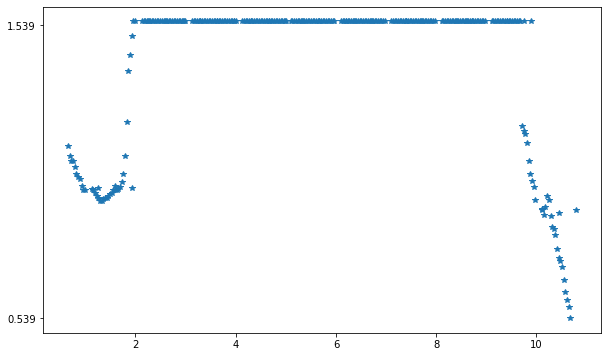

In [43]:
x = StickPositions[["corr_time","x"]].to_numpy()[:,0] ####array
y = StickPositions[["corr_time","x"]].to_numpy()[:,1] ####array

plt.figure(figsize=(10,6))
#plt.axis("off")
plt.yticks(np.arange(y.min(),y.max()))
plt.plot(x,y,"*")

In [44]:
x = BlueDrumPositions[["corr_time","x"]].to_numpy()[:,0] ####array
y = BlueDrumPositions[["corr_time","x"]].to_numpy()[:,1] ####array

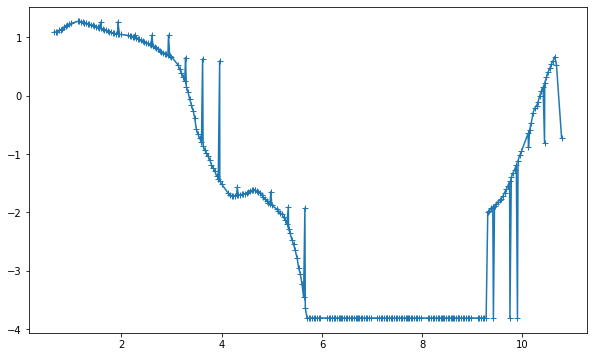

In [45]:
plt.figure(figsize=(10,6))
#plt.axis("off")
plt.plot(x,y, "-+")

In [46]:
x = RedDrumPositions[["corr_time","x"]].to_numpy()[:,0] ####array
y = RedDrumPositions[["corr_time","x"]].to_numpy()[:,1] ####array

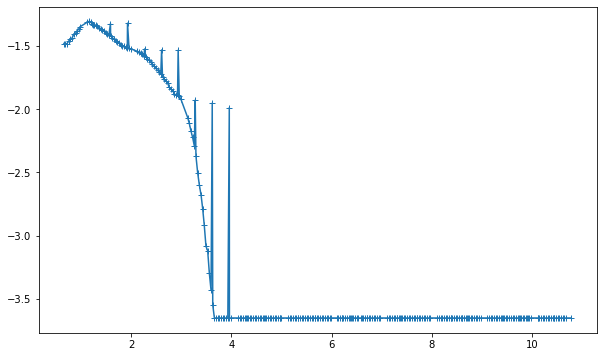

In [47]:
plt.figure(figsize=(10,6))
#plt.axis("off")
plt.plot(x,y, "-+")

In [70]:
# time = StickPositions.to_numpy()[:,0]
# x = StickPositions.to_numpy()[:,1]
# y = StickPositions.to_numpy()[:,2]
# z = StickPositions.to_numpy()[:,3]

In [78]:
# time = BlueDrumPositions.to_numpy()[:,0]
# x = BlueDrumPositions.to_numpy()[:,1]
# y = BlueDrumPositions.to_numpy()[:,2]
# z = BlueDrumPositions.to_numpy()[:,3]

In [79]:
time = RedDrumPositions.to_numpy()[:,0]
x = RedDrumPositions.to_numpy()[:,1]
y = RedDrumPositions.to_numpy()[:,2]
z = RedDrumPositions.to_numpy()[:,3]

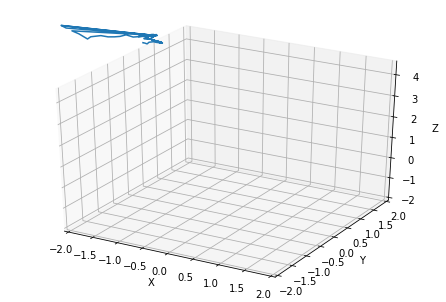

In [80]:
fig = plt.figure()
ax = p3.Axes3D(fig) ## create empty 3d axis

# Setting the axes properties
ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X')

ax.set_ylim3d([-2.0,2.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-2.0,4.5])
ax.set_zlabel('Z')

line = ax.plot_wireframe(x.reshape(-1,1) ,y.reshape(-1,1) ,z.reshape(-1,1) )